<a href="https://colab.research.google.com/github/cacbondioxit/xG-Differential-Project/blob/main/xG_Differential_Cauchy_Distribution_Fitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

우리는 오늘 (G - xG) 혹은 xG Differential이라고 하는 값을 모델링하는 데에 Cauchy Distribution에 가장 적합함을 보일 것이고, (G - xG)가 Cauchy Distribution을 따를 경우 이를 어떻게 해석해야 할지 생각해볼 것이다.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [25]:
!pip install fitter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# 데이터 불러오기

import pandas as pd

epl = []
big_5 = []

for i in range(2017, 2022):
    df = pd.read_csv(f'/content/drive/MyDrive/xG Differential Project/Premier League Shooting Data/{i}-{i+1}.csv')
    epl.append(df)
    df = pd.read_csv(f'/content/drive/MyDrive/xG Differential Project/Big 5 European Leagues Shooting Data/{i}-{i+1}.csv')
    big_5.append(df)

In [3]:
# 데이터프레임을 열이 커지는 방향으로 모두 합침

df_concat_epl = pd.concat(epl)

df_concat_epl

,Rk,Player,Nation,Pos,Squad,Age,Born,90s,Gls,Sh,...,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG,Matches,-9999
0,1,Patrick van Aanholt,nl NED,DF,Crystal Palace,26,1990,24.3,5,33.0,...,4.0,0,0,3.1,3.1,0.09,1.9,1.9,Matches,5f09991f
1,2,Rolando Aarons,eng ENG,MFFW,Newcastle Utd,21,1995,1.5,0,2.0,...,0.0,0,0,0.1,0.1,0.03,-0.1,-0.1,Matches,c5942695
2,3,Tammy Abraham,eng ENG,FW,Swansea City,19,1997,19.2,5,42.0,...,0.0,0,0,6.8,6.8,0.16,-1.8,-1.8,Matches,f586779e
3,4,Charlie Adam,sct SCO,MF,Stoke City,31,1985,4.6,0,9.0,...,3.0,0,1,1.6,0.9,0.09,-1.6,-0.9,Matches,aff418dc
4,5,Adrián,es ESP,GK,West Ham,30,1987,19.0,0,0.0,...,0.0,0,0,0.0,0.0,NaN,0.0,0.0,Matches,f76e6b4e
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541,542,Christoph Zimmermann,de GER,DF,Norwich City,28,1993,1.7,0,2.0,...,0.0,0,0,0.1,0.1,0.04,-0.1,-0.1,Matches,2d5f03bf
542,543,Oleksandr Zinchenko,ua UKR,DF,Manchester City,24,1996,11.6,0,12.0,...,0.0,0,0,0.6,0.6,0.05,-0.6,-0.6,Matches,51cf8561
543,544,Hakim Ziyech,ma MAR,MFFW,Chelsea,28,1993,14.7,4,52.0,...,3.0,0,0,4.1,4.1,0.08,-0.1,-0.1,Matches,6622454d
544,545,Kurt Zouma,fr FRA,DF,West Ham,26,1994,23.1,1,6.0,...,0.0,0,0,0.9,0.9,0.15,0.1,0.1,Matches,ce4246f5


In [4]:
df_concat_big_5 = pd.concat(big_5)

<ipython-input-5-8707ab587b82>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_concat_big_5["Sh"], kde=False).set(title='The Distribution of the number of shooting(Big 5 European Leagues)')


[Text(0.5, 1.0, 'The Distribution of the number of shooting(Big 5 European Leagues)')]

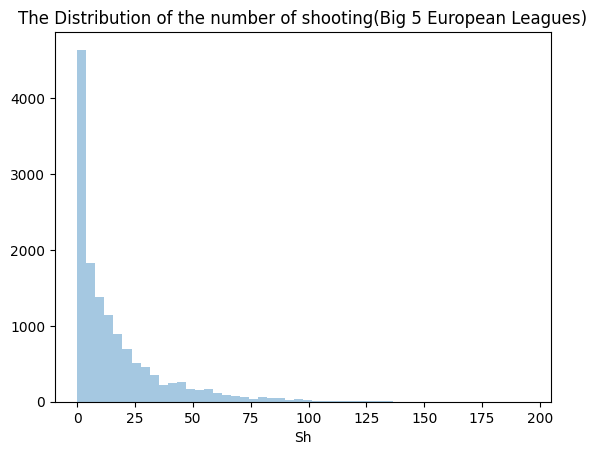

In [5]:
import seaborn as sns

# 선수들의 슈팅 수의 분포를 확인. 5대 리그를 통틀어 단 한 번도 슈팅을 못한 선수들이 가장 많다.
sns.distplot(df_concat_big_5["Sh"], kde=False).set(title='The Distribution of the number of shooting(Big 5 European Leagues)')

<ipython-input-6-6ec638c9a751>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_concat_epl["Sh"], kde=False).set(title='The Distribution of the number of shooting(EPL)')


[Text(0.5, 1.0, 'The Distribution of the number of shooting(EPL)')]

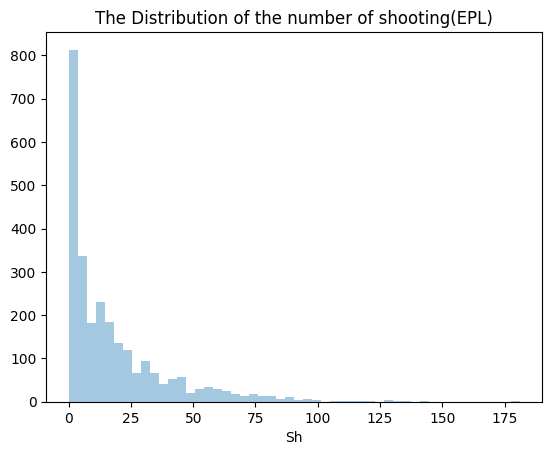

In [6]:
sns.distplot(df_concat_epl["Sh"], kde=False).set(title='The Distribution of the number of shooting(EPL)')

In [ ]:
# 참고로 제목에 한글을 넣으면 깨진다...

In [39]:
# 선수들의 슈팅 수가 5회 이상인 데이터가 몇 %인지 확인하자. 대략 전체의 절반 정도 됨을 알 수 있다.

df_Sh_5 = df_concat_big_5[df_concat_big_5["Sh"] >= 5]

len(df_Sh_5) / len(df_concat_big_5)

0.62733323686876

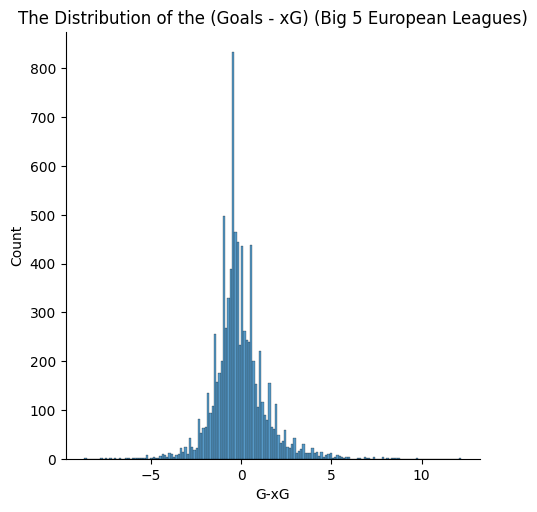

In [41]:
# 5대 리그에서 (실제 득점 - 기대 득점) 값의 분포를 확인. 이 분포가 Cauchy Distribution인지 fit해볼 것이다.

sns.displot(df_Sh_5['G-xG']).set(title='The Distribution of the (Goals - xG) (Big 5 European Leagues)')

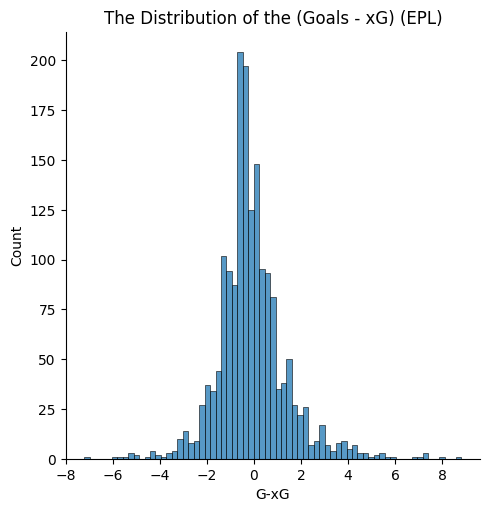

In [42]:
sns.displot(df_concat_epl[df_concat_epl["Sh"] >= 5]['G-xG']).set(title='The Distribution of the (Goals - xG) (EPL)')

In [43]:
df_Sh_5['G-xG'].isnull().sum() # 결측치 개수

2

Fitting 10 distributions: 100%|██████████| 10/10 [00:01<00:00,  6.15it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
cauchy,0.086847,908.042246,-99771.691626,inf,0.069613,5.669387e-37
lognorm,0.152052,1975.066869,-94907.355344,inf,0.082903,2.802984e-52
gamma,0.154537,2004.794158,-94766.848344,inf,0.084889,8.499814e-55
norm,0.167461,2140.870651,-94079.635101,inf,0.095520,2.707870e-69
rayleigh,0.801580,705.857323,-80505.422723,inf,0.397018,0.000000e+00


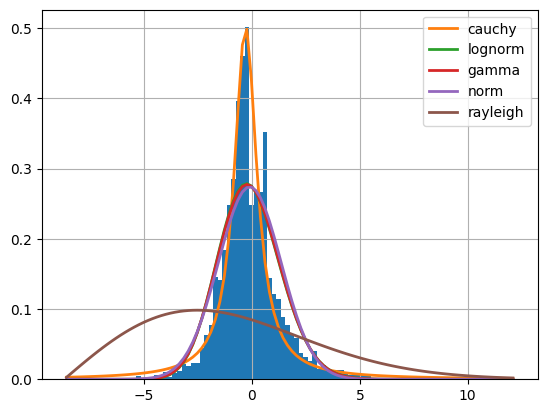

In [49]:
# 이제 득점 - xG값이 Cauchy Distribution에 가장 근접함을 보일 것이다.

from fitter import Fitter, get_common_distributions

G_minus_xG_europe = df_Sh_5['G-xG'].dropna().values
f = Fitter(G_minus_xG_europe,
           distributions=get_common_distributions())
f.fit()
f.summary()

In [50]:
f.get_best(method='sumsquare_error')

{'cauchy': {'loc': -0.2948673993931151, 'scale': 0.6329992797801969}}

이처럼 (득점 - xG)값을 모델링하는 데에는 Cauchy Distribution이 가장 적합하다는 결론이 나왔다. 이는 무슨 의미일까?

축구에서 (G - xG) 값은 다양한 요인이 영향을 미칠 수 있는 값인데, (G - xG) 값이 Cauchy Distribution을 따른다는 것은 이 값이 극단적인 이상치(Outlier) 값이 발생할 가능성이 크다는 것을 의미한다. Cauchy 분포는 극단값이 상대적으로 더 자주 발생하는 fat-tailed 분포이기 때문에, 아웃라이어의 발생이 더 높아진다. 따라서 (G - xG) 값은 선수에 따라 매우 크거나 작을 확률이 높기 때문에, (G - xG)가 가지는 불안정성을 고려해야 한다. 예를 들어 동일한 선수라 하더라도 경기 상황이나 상대 팀의 방어력, 득점 기회의 수에 따라 (G - xG)의 값이 크게 차이날 수 있다. 또한 누군가는 특정한 조건에서 골을 더 많이 넣는 경향이 있을 수 있다. 그리고 그런 선수가 특정 경기에서는 더욱 높은 득점을 기록할 수도 있다.

이러한 특성 때문에 (G - xG)값은 선수의 일관적인 특성을 잘 반영하지 못한다고 평가할 수 있다. 이 값의 신뢰성이 떨어진다는 것이다. 예를 들어 선수를 평가하는 기계학습 모델에 (G - xG)를 입력 변수(피처)로 넣었을 때 모델의 예측력을 저하시키는 노이즈 값으로 작용할 가능성이 높다. ML 모델을 구축하는 데에 익숙하다면 이상치를 제거하거나 대체할 방법을 떠올리겠지만, 이는 코시 분포의 특성을 무시하는 것과 같다.

또한 Cauchy 분포는 평균과 분산이 정의되지 않는다. 그러므로 G-xG의 표본평균이나 표본분산을 계산하는 것은 의미 없을 수 있다.


